# [Java反射/四大核心类/Class 、Constructor、Method、Field](https://blog.csdn.net/guijun6/article/details/80302517)

## 反射
反射指的是对象的反向处理操作，根据对象取得对象的来源信息，在反射的世界里面，看重的不再是一个对象，而是对象身后的组成（类、构造、成员）。

Class类是描述整个类的概念，也是整个反射的操作源头，在使用Class类的时候需要关注的依然是这个类的对象。
而这个类的对象的产生模式一共有三种：
1. 任何类的实例化对象可以通过Object类中的getClass()方法取得Class类对象。
2. "类.class":直接根据某个具体的类来取得Class类的实例化对象。
3. 使用Class类提供的方法:public static Class<?> forName(String className) throwsClassNotFoundException

例：使用getClass()方法

In [7]:
import java.util.Date;
public class Test {
    public static void main() {
        Date date = new Date() ;
        System.out.println(date.getClass());
    }
}

In [8]:
Test.main();

class java.util.Date


例：使用某个具体的类.class

In [9]:
public class Test {
    public static void main() {
        Class<?> cls = Date.class;
        System.out.println(cls);
    }
}

In [10]:
Test.main();

class java.util.Date


例：使用Class.froName()方法

In [11]:
public class Test {
    public static void main() throws ClassNotFoundException {
        Class<?> cls = Class.forName("java.util.Date") ;
        System.out.println(cls);
    }
}

In [12]:
Test.main();

class java.util.Date


在以上给出的三个方法中我们可以发现，除了第一种方法会产生Date类的实例化对象之外，其他的两种都不会产生Date类的实例化对象。于是取得了Class类对象有一个最直接的好处:**可以通过反射实例化对象**，在Class类中定义有如下方法：
```java
public T newInstance()throws InstantiationException, IllegalAccessException
```

例：通过反射实例化对象

In [13]:
public class Test {
    public static void main() throws ClassNotFoundException,InstantiationException,IllegalAccessException {
        Class<?> cls = Class.forName("java.util.Date") ;
        Object obj = cls.newInstance() ; // 实例化对象，等价于 new java.util.Date() ;
        System.out.println(obj);
    }
}

In [14]:
Test.main();

Sat Nov 07 14:52:05 UTC 2020


这里举一个传统工厂模式与改用反射后的工厂模式进行对比

例：传统工厂类

In [15]:
//接口
interface IFruit {
    public void text() ;
}
//Apple实现接口
class Apple implements IFruit {
    //重写接口方法
    @Override
    public void text() {
        System.out.println("苹果");
    }
}
//工厂类
class FruitFactory {
    //私有的构造方法
    private FruitFactory() {}
    //生成需要的对象的方法
    public static IFruit getInstance(String className) {
        if ("apple".equals(className)) {
            return new Apple() ;
        }
        return null ;
    }
}
public class Test {
    public static void main() {
        IFruit fruit = FruitFactory.getInstance("apple") ;
        fruit.text() ;
    }
}

In [16]:
Test.main();

苹果


补充：

如果构造方法是私有的,则意味着无法从除自身之外的任何类访问它。这是Java提供的访问控制机制。 如果使用得当,它可以产生安全性和功能性。构造函数(如常规方法)也可以声明为私有。您可能 想知道为什么我们需要一个私有构造函数,因为它只能从它自己的类访问。

以上传统工厂类问题就在于new。每增加一个接口的子类就需要修改工厂类。

例：传统工厂类增加接口子类

In [17]:
class Orange implements IFruit {
    @Override
    public void text() {
        System.out.println("橘子");
    }
}
class FruitFactory {
    private FruitFactory() {}
    
    public static IFruit getInstance(String className) {
        if ("apple".equals(className)) {
            return new Apple() ;
        }else if ("orange".equals(className)) {
            return new Orange() ;
        }
        return null ;
    }
}

In [18]:
public class Test {
    public static void main() {
        IFruit fruit = FruitFactory.getInstance("orange") ;
        fruit.text() ;
    }
}
Test.main();

橘子


如果要想解决关键字new带来的问题，最好的做法就是通过反射来完成处理，因为Class类可以**使用newInstance()实例化对象**，同时**Class.forName()能够接收类名称**。

例：利用反射修改后的工厂模式

In [59]:
//package cn.anlzou.reflection;

interface IFruit {
    public void text() ;
}

class Apple implements IFruit {
    @Override
    public void text() {
        System.out.println("苹果");
    }
}

class Orange implements IFruit {
    @Override
    public void text() {
        System.out.println("橘子");
    }
}

class FruitFactory {
    private FruitFactory() {}
    
    public static IFruit getInstance(String className) {
        IFruit fruit = null;
        try {
            fruit = (IFruit) Class.forName(className).newInstance();//className为包名+类名，eg:cn.anlzou.reflection or 类名
        } catch (InstantiationException | IllegalAccessException | ClassNotFoundException e) {
            e.printStackTrace();
        }
        return fruit ;
    }
}

public class Test {
    public static void main() {
        //Class<?> obj = Orange.class;
        //System.out.println(obj.getPackage().getName());//REPL
        IFruit fruit = FruitFactory.getInstance("REPL.Orange");
        fruit.text() ;
    }
}

In [60]:
Test.main();

java.lang.ClassNotFoundException: REPL.Orange
	at java.base/java.net.URLClassLoader.findClass(URLClassLoader.java:471)
	at jdk.jshell/jdk.jshell.execution.DefaultLoaderDelegate$RemoteClassLoader.findClass(DefaultLoaderDelegate.java:154)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:589)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:522)
	at java.base/java.lang.Class.forName0(Native Method)
	at java.base/java.lang.Class.forName(Class.java:315)
	at REPL.$JShell$26M$FruitFactory.getInstance($JShell$26M.java:23)
	at REPL.$JShell$19Z$Test.main($JShell$19Z.java:21)
	at REPL.$JShell$53.do_it$($JShell$53.java:15)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:56

EvalException: null

提示：jupyter notebook 环境不支持包

引入反射后，每当新增接口子类，**无需去修改工厂类代码**就可以很方便的进行接口子类扩容。以上这种工厂类代码我们称之为**简单工厂模式**。

## 反射类操作（四大核心类）
利用反射可以做出一个对象具备的所有操作行为，最为关键的是这一切的操作都可以基于Object进行。
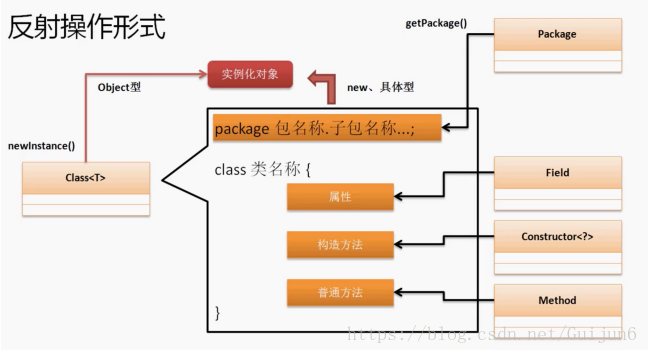
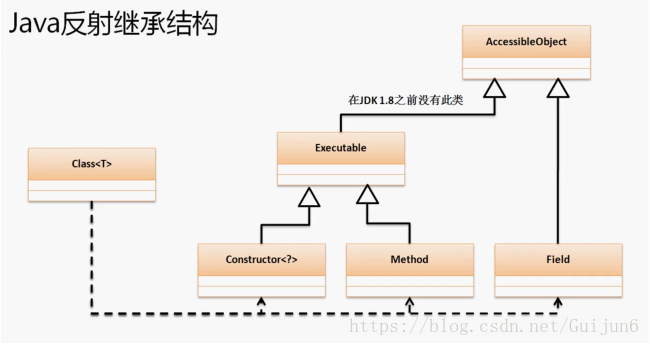

### 取得父类信息
在java中任何的程序类都一定会有父类，在Class类中就可以通过如下方法来取得父类或者实现的父接口：

取得类的包名称:
```java
public Package getPackage()
```

例：取得包名称

In [47]:
interface IFruit {}

interface IMessage{}

class CLS implements IFruit,IMessage{}

public class Test {
    public static void main() {
        Class<?> cls = CLS.class ; // 取得Class类对象
        System.out.println(cls.getPackage().getName());
        
        //test
        Class<?> obj = Object.class;
        System.out.println(obj.getPackage().getName());
    }
}

Test.main();

REPL
java.lang


取得父类的Class对象: 
```java
public native Class<? super T> getSuperclass();
```
取得实现的父接口:
```java
public Class<?>[] getInterfaces();
```

例：取得父类（实现的父接口）

In [62]:
//package cn.anlzou.reflection;
interface IFruit {}

interface IMessage{}

class CLS implements IFruit,IMessage{}

public class Test {
    public static void main() {
        Class<?> cls = CLS.class ; // 取得Class类对象
        // 取得Package名称
        System.out.println(cls.getPackage().getName());
        // 取得父类名称
        System.out.println(cls.getSuperclass().getName());
        // 取得实现的父接口对象
        Class<?>[] iClass = cls.getInterfaces() ;
        for (Class<?> class1 : iClass) {
            System.out.println(class1.getName());
        }
    }
}

Test.main();

REPL
java.lang.Object
REPL.$JShell$24K$IFruit
REPL.$JShell$40$IMessage


通过反射可以取得类结构上的所有关键信息。

### 反射调用构造
个类中可以存在多个构造方法，如果要想取得类中构造的调用，就可以使用Class类中提供的两个方法:
1. 取得指定参数类型的构造：
```java
public Constructor<T> getConstructor(Class<?>... parameterTypes)throws NoSuchMethodException, SecurityException
```
2. 取得类中的所有构造:
```java
public Constructor<?>[] getConstructors() throws SecurityException
```

以上两个方法返回的类型都是`java.lang.reflect.Constructor`类的实例化对象，这个类之中大家只需要关注一个方法：
```java
public T newInstance(Object ... initargs)throws InstantiationException, IllegalAccessException,IllegalArgumentException, InvocationTargetException
```

例：取得类中所有构造信息

In [63]:
//package cn.anlzou.reflcetion;

import java.lang.reflect.Constructor;

class Person {
    //多个构造方法
    public Person() {}
    public Person(String name) {}
    public Person(String name,int age) {}
}

public class Test {
    public static void main() {
        Class<?> cls = Person.class ;
        
        // 取得类中的全部构造
        Constructor<?>[] constructors = cls.getConstructors() ;
        for (Constructor<?> constructor : constructors) {
            System.out.println(constructor);
        }
    }
}

Test.main();

public REPL.$JShell$57$Person()
public REPL.$JShell$57$Person(java.lang.String)
public REPL.$JShell$57$Person(java.lang.String,int)


以上的操作是直接利用了Constructor类中的toString()方法取得了构造方法的完整信息(包含方法权限，参数列表)，而如果你只使用了getName()方法，只会返回构造方法的包名.类名。

**Class类通过反射实例化类对象的时候，只能够调用类中的无参构造。如果现在类中没有无参构造则无法使用Class类调用，只能够通过明确的构造调用实例化处理。因此，在定义简单java类的时候一定要保留有一个无参构造。**

In [65]:
//package cn.anlzou.reflection;

import java.lang.reflect.Constructor;
import java.lang.reflect.InvocationTargetException;

class Person {
    private String name = "init_anlzou";
    private int age = 0;
    //无参构造
    public Person() {}
    //有参构造
    public Person(String name,int age) {
        this.name = name ;
        this.age = age ;
    }
    @Override
    public String toString() {
        return "Person [name=" + name + ", age=" + age + "]";
    }
}
public class Test {
    public static void main() throws InstantiationException,IllegalAccessException, NoSuchMethodException, SecurityException, IllegalArgumentException,InvocationTargetException {
        Class<?> cls = Person.class ;
        
        //直接用Class实例化对象只能调用无参构造
        System.out.println(cls.newInstance());
        
        // 取得指定参数类型的构造方法对象
        Constructor<?> cons = cls.getConstructor(String.class,int.class) ;
        System.out.println(cons.newInstance("yuisama",29));
    }
}

Test.main();

Person [name=init_anlzou, age=0]
Person [name=yuisama, age=29]


## 反射调用普通方法(核心)
类中普通方法的反射调用你在开发之中一定会使用到，并且使用好了可以节省大量的重复编码。在Class类中有如下两种取得类中普通方法的函数:
1. 取得全部普通方法:
```java
public Method[] getMethods() throws SecurityException
```
2. 取得指定普通方法：
```java
public Method getMethod(String name, Class<?>... parameterTypes)
```

以上两个方法是`java.lang.reflect.Method`类的对象方法，在此类中提供有一个调用方法的支持:

调用：
```java
public Object invoke(Object obj, Object... args) throws IllegalAccessException,IllegalArgumentException,InvocationTargetException
```

例：取得一个类中的全部普通构造方法

In [66]:
//package cn.anlzou.reflection;
import java.lang.reflect.InvocationTargetException;
import java.lang.reflect.Method;

class Person {
    private String name ;
    private int age ;
    
    public Person() {}
    public Person(String name,int age) {
        this.name = name ;
        this.age = age ;
    }
    @Override
    public String toString() {
        return "Person [name=" + name + ", age=" + age + "]";
    }
    public String getName() {
        return name;
    }
    public void setName(String name) {
        this.name = name;
    }
    public int getAge() {
        return age;
    }
    public void setAge(int age) {
        this.age = age;
    }
}
public class Test {
    public static void main() throws Exception {
        Class<?> cls = Person.class ;
        
        Method[] methods = cls.getMethods() ;
        for (Method method : methods) {
            System.out.println(method);
        }
    }
}

Test.main();

public java.lang.String REPL.$JShell$57G$Person.toString()
public java.lang.String REPL.$JShell$57G$Person.getName()
public void REPL.$JShell$57G$Person.setName(java.lang.String)
public void REPL.$JShell$57G$Person.setAge(int)
public int REPL.$JShell$57G$Person.getAge()
public final native void java.lang.Object.wait(long) throws java.lang.InterruptedException
public final void java.lang.Object.wait(long,int) throws java.lang.InterruptedException
public final void java.lang.Object.wait() throws java.lang.InterruptedException
public boolean java.lang.Object.equals(java.lang.Object)
public native int java.lang.Object.hashCode()
public final native java.lang.Class java.lang.Object.getClass()
public final native void java.lang.Object.notify()
public final native void java.lang.Object.notifyAll()
